# 1차 미니프로젝트 - 서울시 생활정보 기반 대중교통 수요 분석

## 문제 : 버스 노선 추가 필요 대상 지역(구 단위) 선정

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
import scipy.stats as spst

# 한글 폰트 적용
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')      

### 데이터 불러오기

In [9]:
bus = pd.read_csv('df_seoul_bus_station.csv')
move = pd.read_csv('df_seoul_moving.csv')

In [11]:
move.rename(columns={'도착':'자치구'}, inplace=True)
standard = pd.merge(bus, move, on='자치구')
standard

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,강남구,499,91,8030483,7569213,128.767927,121.371512,23.284573,83.309306,12904380,46170267.40
1,강동구,369,21,2890053,2830506,99.161194,97.118065,26.108477,59.889404,9596980,22014206.89
2,강북구,413,67,4825181,4671783,133.020373,128.791504,24.282441,36.281421,8765160,13096395.71
3,강서구,566,49,4681083,4652828,88.119480,87.587591,25.496986,54.208682,10718780,22789004.72
4,관악구,466,86,7655819,7792476,154.753674,157.516040,23.842468,46.586809,10091730,19718658.80
5,광진구,269,41,2749448,2753411,118.352546,118.523137,22.779081,43.712430,9761770,18732568.44
6,구로구,486,79,4942197,4730992,119.235615,114.140076,23.480408,38.895596,9072360,15028480.32
7,금천구,345,58,3776658,3581930,123.098370,116.751304,24.394485,28.730583,7190250,8468310.47
8,노원구,514,57,4353295,4292724,88.476211,87.245168,24.497542,51.091182,10256190,21389936.36
9,도봉구,359,46,3304305,3211421,106.859356,103.855540,25.102882,35.099543,8053130,11260109.02


In [10]:
o_bus1 = pd.read_csv('1.1 BUS_STATION_BOARDING_MONTH_202204.csv', sep=",", encoding = "cp949")
o_bus2 = pd.read_csv('1.1 bus_station.csv', sep=",", encoding = "UTF-8")
o_move = pd.read_csv('1.2 seoul_moving_month_4.csv',sep=",", index_col = 0, encoding = 'UTF-8')

### 가설 수립
1) 정류장과 노선 수 대비 이용자
2) 이동시간 대비 이용자
3) 두 지역구 간의 이동 빈도

### 단변량 분석

+ 변수의 비즈니스 의미  
+ 숫자? 범주?  
+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량
+ 분포  
+ 위 정보로부터 파악한 내용(비즈니스!) 정리  
+ 추가 분석해볼 사항 도출

In [20]:
# 가설 1, 2 데이터
print(standard.shape)
print()
print(standard.isna().sum())
print()
print(standard.info())
print()
print(standard.describe())

(25, 11)

자치구            0
정류장수           0
노선수            0
승차총승객수         0
하차총승객수         0
승차평균승객수        0
하차평균승객수        0
평균 이동 시간(분)    0
이동인구(합)        0
총 이동 시간        0
총 이동인구         0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   자치구          25 non-null     object 
 1   정류장수         25 non-null     int64  
 2   노선수          25 non-null     int64  
 3   승차총승객수       25 non-null     int64  
 4   하차총승객수       25 non-null     int64  
 5   승차평균승객수      25 non-null     float64
 6   하차평균승객수      25 non-null     float64
 7   평균 이동 시간(분)  25 non-null     float64
 8   이동인구(합)      25 non-null     float64
 9   총 이동 시간      25 non-null     int64  
 10  총 이동인구       25 non-null     float64
dtypes: float64(5), int64(5), object(1)
memory usage: 2.3+ KB
None

             정류장수         노선수        승차총승객수        하차총승객수     승차평균승객수  \

In [21]:
# 가설 3 데이터
print(o_move.shape)
print()
print(o_move.isna().sum())
print()
print(o_move.info())
print()
print(o_move.describe())

(28923054, 10)

대상연월           0
요일             0
도착시간           0
출발 시군구 코드      0
도착 시군구 코드      0
성별             0
나이             0
이동유형           0
평균 이동 시간(분)    0
이동인구(합)        0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28923054 entries, 0 to 968462
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
dtypes: int64(6), object(4)
memory usage: 2.4+ GB
None

             대상연월          도착시간     출발 시군구 코드     도착 시군구 코드            나이  \
count  28923054.0  2.892305e+07  2.892305e+07  2.892305e+07  2.892305e+07   
mean     202204.0  1.365597e+01  1.712362e+04  1.719750e+04  4.279614e+01   
std           0.0  5.849675e+00  9.046478e+03  9.063818e+03  1.777485e+01   
min      202204.0  0.00

In [22]:
# 유동인구 데이터 전처리
o_move.replace("*","2", inplace=True)
o_move = o_move.astype({'이동인구(합)':'float'})

o_move['출발'] = o_move['출발 시군구 코드'].map({
    11010 : '종로구'
    ,11020 : '중구'
    , 11030 : '용산구'
    , 11040	: '성동구'
    , 11050	: '광진구'
    , 11060	: '동대문구'
    , 11070	: '중랑구'
    , 11080	: '성북구'
    , 11090	: '강북구'
    , 11100	: '도봉구'
    , 11110	: '노원구'
    , 11120	: '은평구'
    , 11130	: '서대문구'
    , 11140	: '마포구'
    , 11150	: '양천구'
    , 11160	: '강서구'
    , 11170	: '구로구'
    , 11180	: '금천구'
    , 11190	: '영등포구'
    , 11200	: '동작구'
    , 11210	: '관악구'
    , 11220	: '서초구'
    , 11230	: '강남구'
    , 11240	: '송파구'
    , 11250	: '강동구' 
})

o_move['도착'] = o_move['도착 시군구 코드'].map({
    11010 : '종로구'
    ,11020 : '중구'
    , 11030 : '용산구'
    , 11040	: '성동구'
    , 11050	: '광진구'
    , 11060	: '동대문구'
    , 11070	: '중랑구'
    , 11080	: '성북구'
    , 11090	: '강북구'
    , 11100	: '도봉구'
    , 11110	: '노원구'
    , 11120	: '은평구'
    , 11130	: '서대문구'
    , 11140	: '마포구'
    , 11150	: '양천구'
    , 11160	: '강서구'
    , 11170	: '구로구'
    , 11180	: '금천구'
    , 11190	: '영등포구'
    , 11200	: '동작구'
    , 11210	: '관악구'
    , 11220	: '서초구'
    , 11230	: '강남구'
    , 11240	: '송파구'
    , 11250	: '강동구' 
})

o_move.info(), o_move.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28923054 entries, 0 to 968462
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발 시군구 코드    int64  
 4   도착 시군구 코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균 이동 시간(분)  int64  
 9   이동인구(합)      float64
 10  출발           object 
 11  도착           object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.8+ GB


(None, (28923054, 12))

In [23]:
# 데이터 집계
o_move = o_move.loc[(o_move['출발 시군구 코드'] < 20000) & (o_move['도착 시군구 코드'] < 20000)]
o_move_sum1 = o_move.groupby(by=['출발', '도착'], as_index=False)['이동인구(합)'].sum()
o_move_sum1.rename(columns={'이동인구(합)' : '총 이동인구'}, inplace=True)
o_move_sum2 = o_move.groupby(by=['출발', '도착'], as_index=False)['평균 이동 시간(분)'].sum()
o_move_sum2.rename(columns={'평균 이동 시간(분)' : '총 이동 시간'}, inplace=True)
o_move_mean1 = o_move.groupby(by=['출발', '도착'], as_index=False)['이동인구(합)'].mean()
o_move_mean2 = o_move.groupby(by=['출발', '도착'], as_index=False)['평균 이동 시간(분)'].mean()
o_move_count = o_move.groupby(by=['출발', '도착'], as_index=False)['평균 이동 시간(분)'].count()
o_move_count.rename(columns={'평균 이동 시간(분)' : '빈도'}, inplace=True)

In [28]:
o_move_sum = pd.merge(o_move_sum1, o_move_sum2, on=['출발', '도착'])
o_move_mean = pd.merge(o_move_mean1, o_move_mean2, on=['출발', '도착'])
tmp_merge = pd.merge(o_move_sum, o_move_mean, on=['출발', '도착'])
o_move_m = pd.merge(tmp_merge, o_move_count, on=['출발', '도착'])
o_move_m

,출발,도착,총 이동인구,총 이동 시간,이동인구(합),평균 이동 시간(분),빈도
0,강남구,강남구,24645635.26,603670,525.728690,12.877194,46879
1,강남구,강동구,887641.96,616490,35.747330,24.827433,24831
2,강남구,강북구,255581.36,489030,16.423426,31.424624,15562
3,강남구,강서구,468843.27,581830,24.571211,30.492637,19081
4,강남구,관악구,1153663.97,608100,46.157637,24.329839,24994
...,...,...,...,...,...,...,...
620,중랑구,용산구,109326.21,286250,10.997506,28.794890,9941
621,중랑구,은평구,45210.57,228080,6.384772,32.210140,7081
622,중랑구,종로구,258428.59,350540,18.717215,25.388571,13807
623,중랑구,중구,270464.77,380020,18.523715,26.026984,14601


In [29]:
# 가설 3 데이터
print(o_move_m.shape)
print()
print(o_move_m.isna().sum())
print()
print(o_move_m.info())
print()
print(o_move_m.describe())

(625, 7)

출발             0
도착             0
총 이동인구         0
총 이동 시간        0
이동인구(합)        0
평균 이동 시간(분)    0
빈도             0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 0 to 624
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   출발           625 non-null    object 
 1   도착           625 non-null    object 
 2   총 이동인구       625 non-null    float64
 3   총 이동 시간      625 non-null    int64  
 4   이동인구(합)      625 non-null    float64
 5   평균 이동 시간(분)  625 non-null    float64
 6   빈도           625 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 39.1+ KB
None

             총 이동인구        총 이동 시간     이동인구(합)  평균 이동 시간(분)            빈도
count  6.250000e+02     625.000000  625.000000   625.000000    625.000000
mean   8.093627e+05  395984.416000   27.862276    26.423338  17049.432000
std    2.280681e+06  115044.519068   48.960755     6.351124   9412.371705
min    1.7

### 이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [30]:
target = '자치구'
use = ['승차총승객수','하차총승객수','승차평균승객수','하차평균승객수', '평균 이동 시간(분)', '이동인구(합)', '총 이동 시간', '총 이동인구']

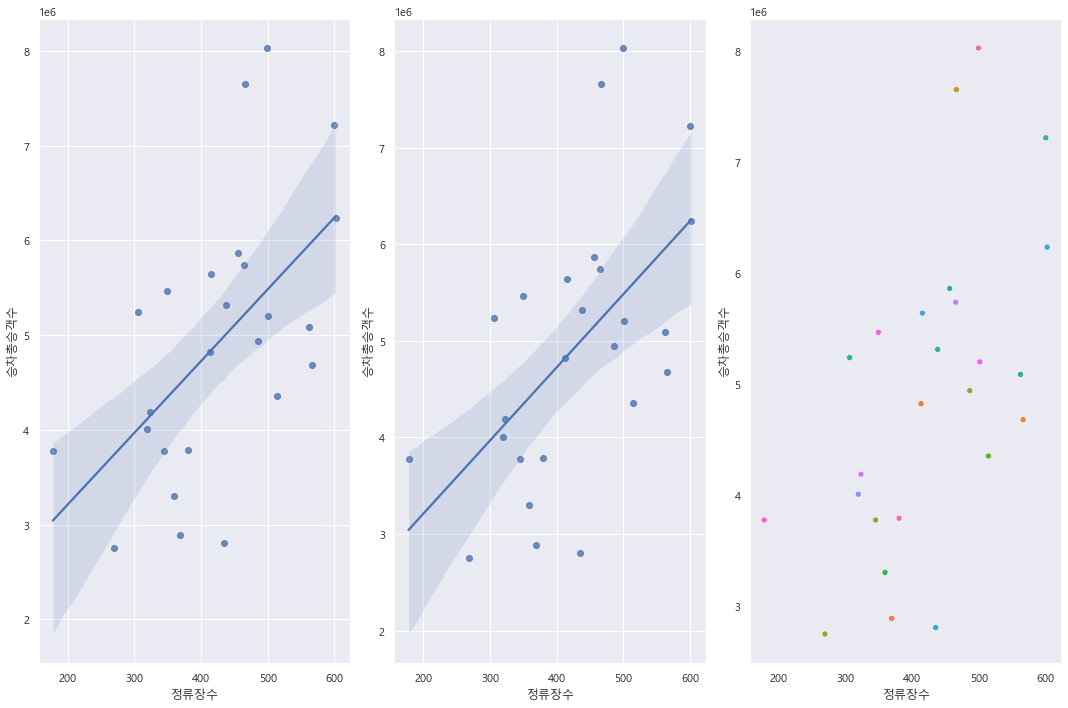

승차총승객수 : (0.5666813370974586, 0.003141977397117319)


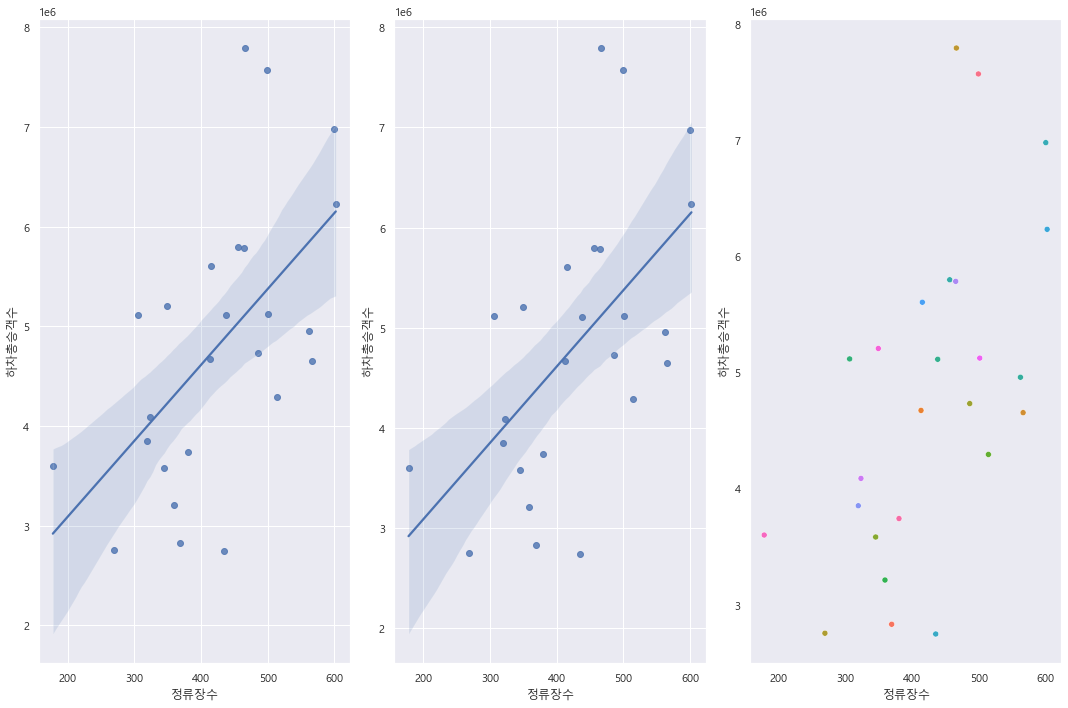

하차총승객수 : (0.5784790149467576, 0.0024518332034538645)


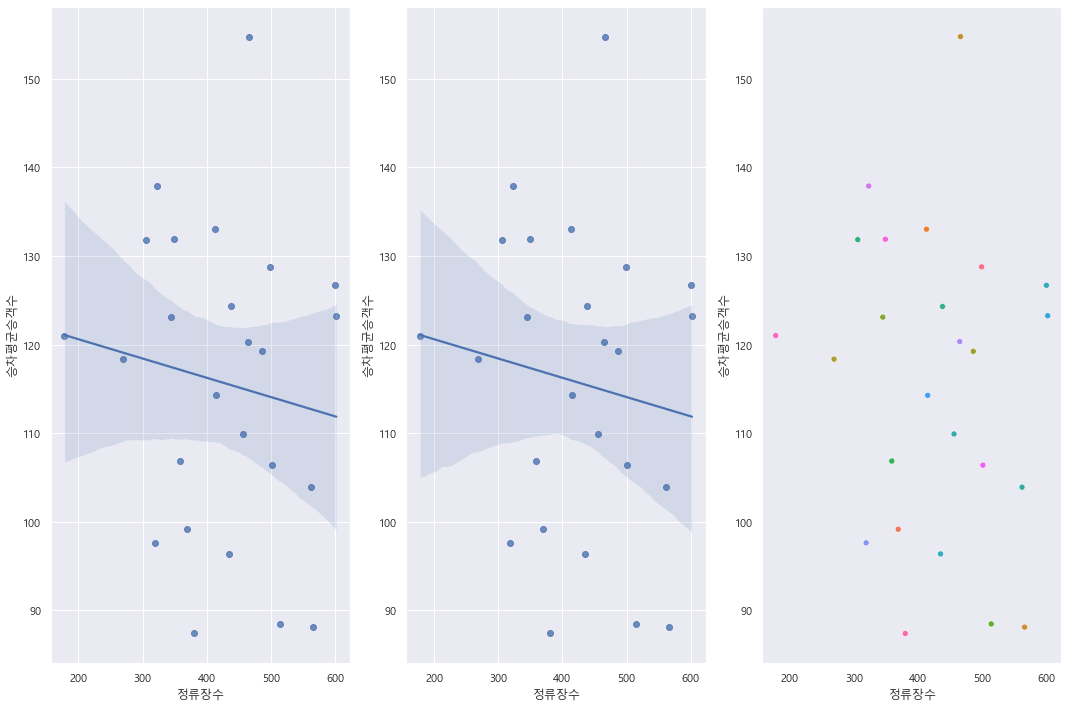

승차평균승객수 : (-0.13531841122802116, 0.5189725687303929)


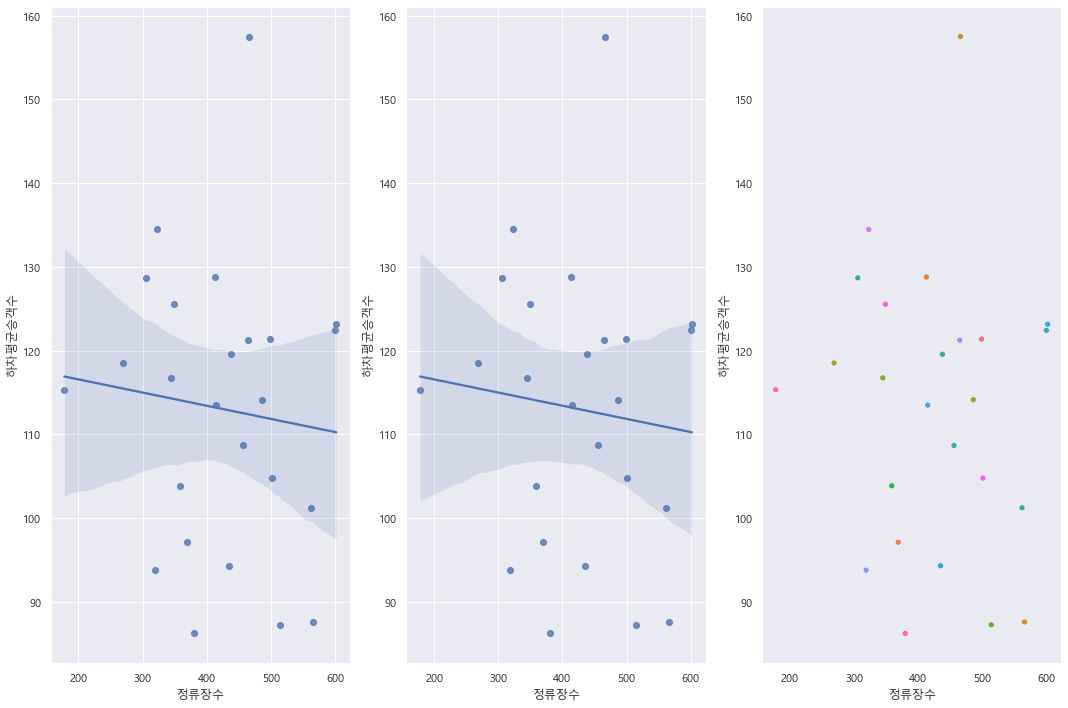

하차평균승객수 : (-0.09914592134749221, 0.637273177989508)


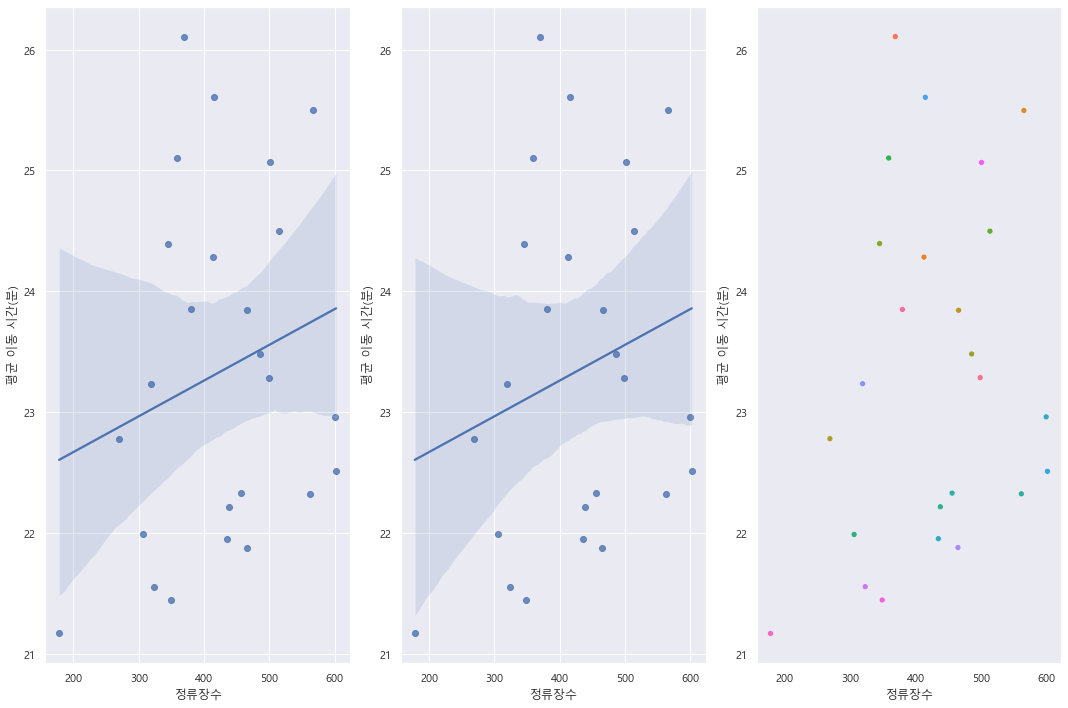

평균 이동 시간(분) : (0.21945177217957054, 0.29188294040892454)


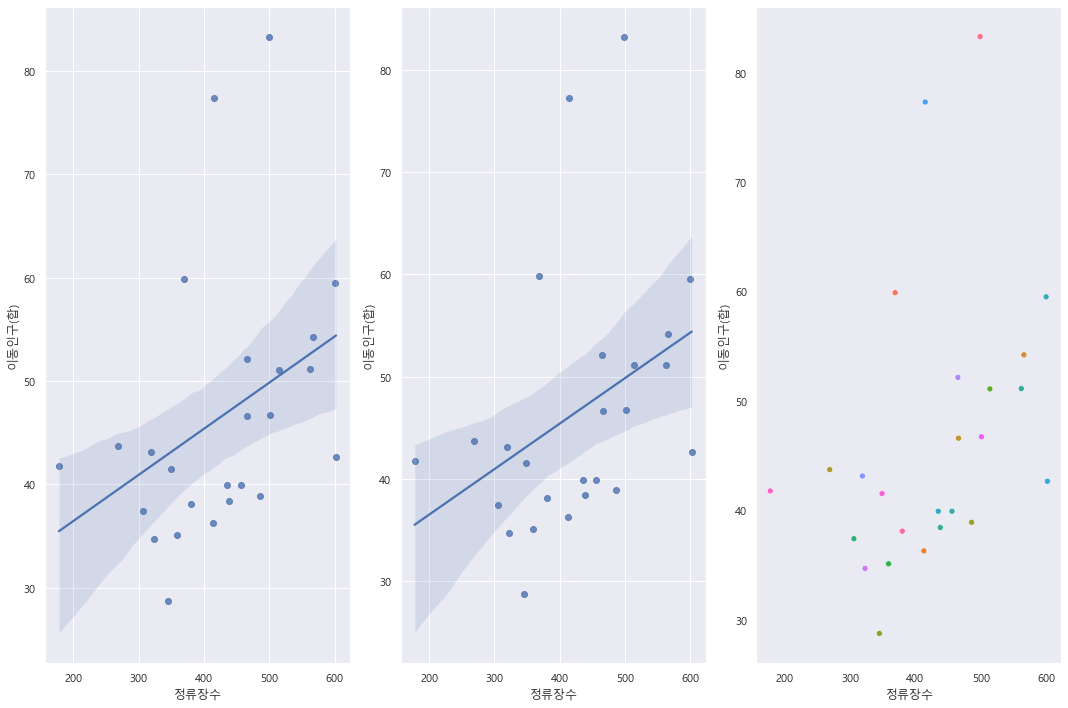

이동인구(합) : (0.3711332281288715, 0.06777105417986702)


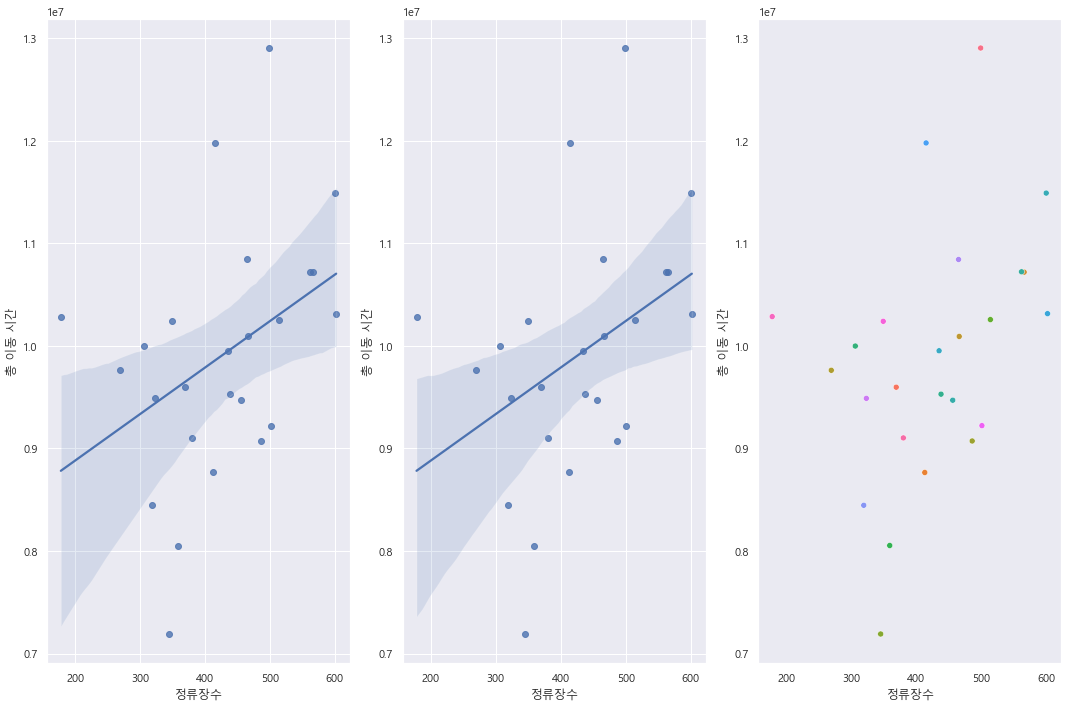

총 이동 시간 : (0.3975183836285089, 0.049092532793957214)


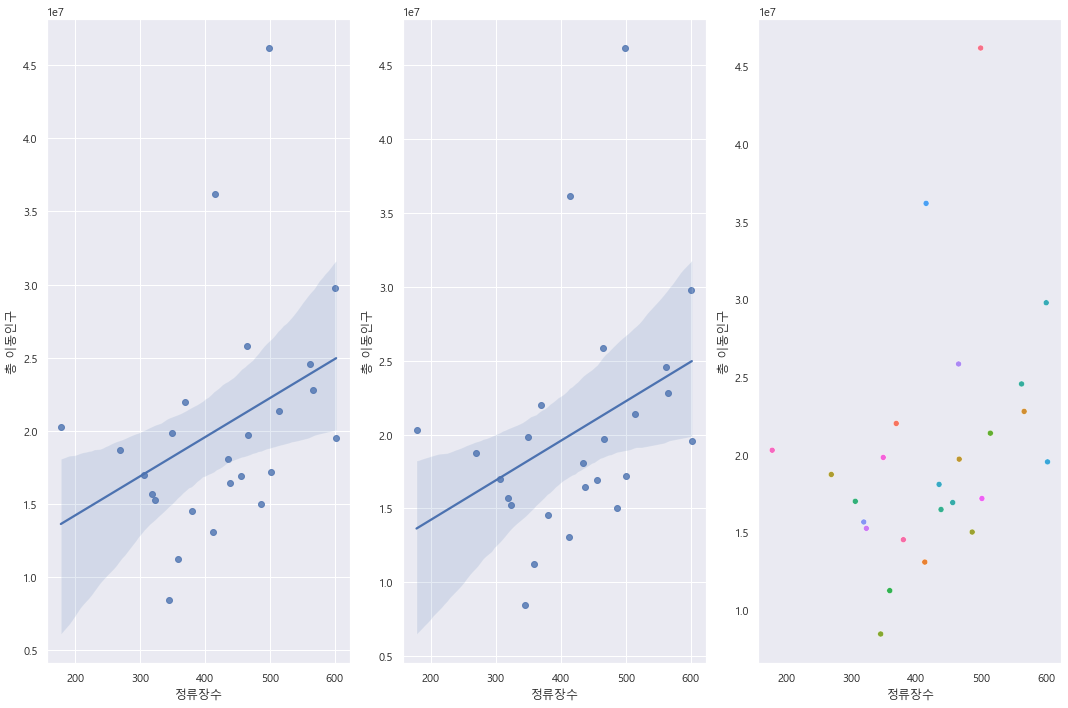

총 이동인구 : (0.3585310360765819, 0.07842047180561913)


In [31]:
# 정류장 별 승하차
for i in use:
    plt.figure(figsize=(15,10))
    plt.subplot(1,3,1)
    sns.regplot(data=standard, x='정류장수', y=i)
    plt.subplot(1,3,2)
    sns.regplot(data=standard, x='정류장수', y=i)
    plt.subplot(1,3,3)
    sns.scatterplot(data=standard, x='정류장수', y=i, hue=target, legend=False)
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    result = spst.pearsonr(standard['정류장수'], standard[i])
    print(f'{i} : {result}')

##### 가설 1-1 정류장수 별 이용자 ( 상관관계 )
1. 승/하차총승객수와 관계에서는 상관계수 0.5 이상으 큰 관계가 있어 보임
2. 승/하차평균승객수와 관계에서는 상관계수 0.13, 0.09로 관계가 거의 없어 보임
3. 이동인구 평균과 총합의 관계에서 상관계사 0.3 정도의 약간의 관계가 있어 보임

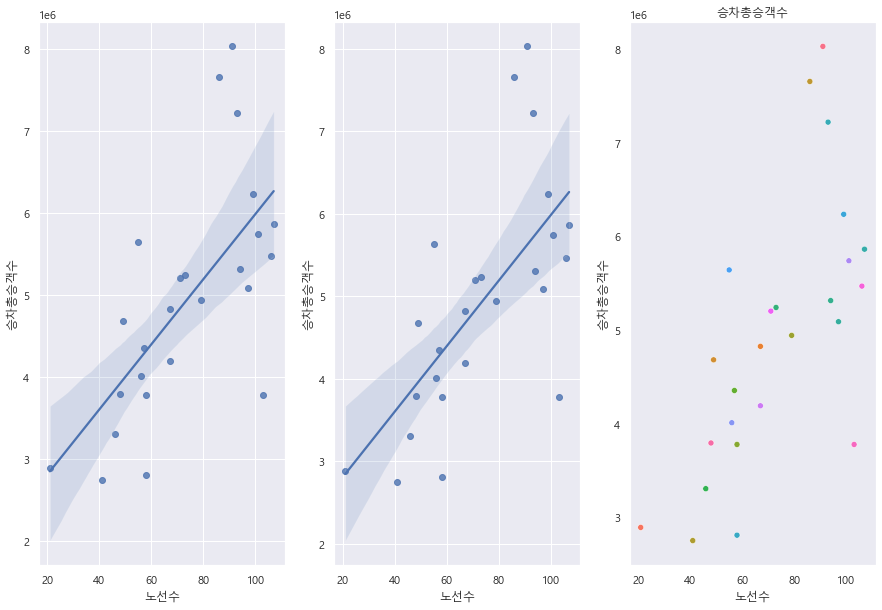

승차총승객수 : (0.6654877832095705, 0.0002830862285771965)


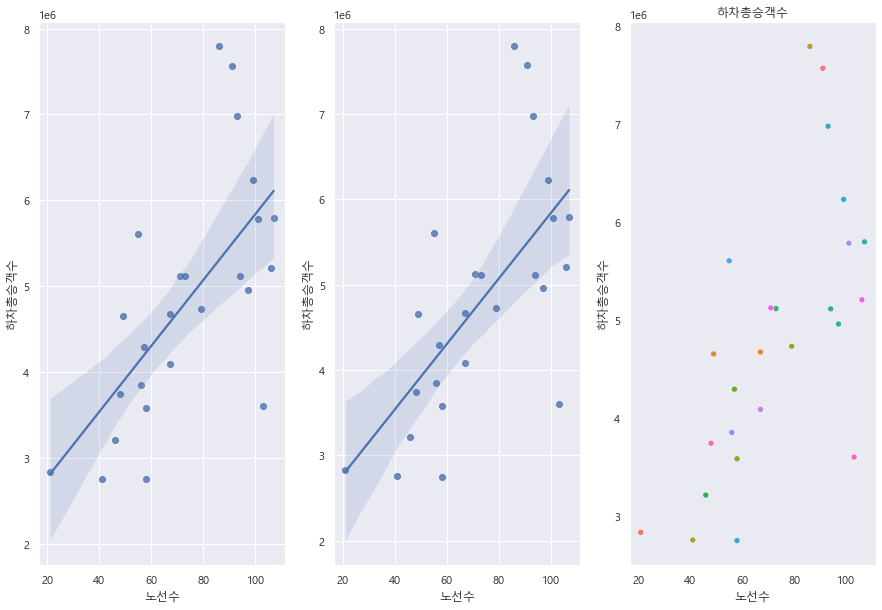

하차총승객수 : (0.6526422720355217, 0.00040610118937178525)


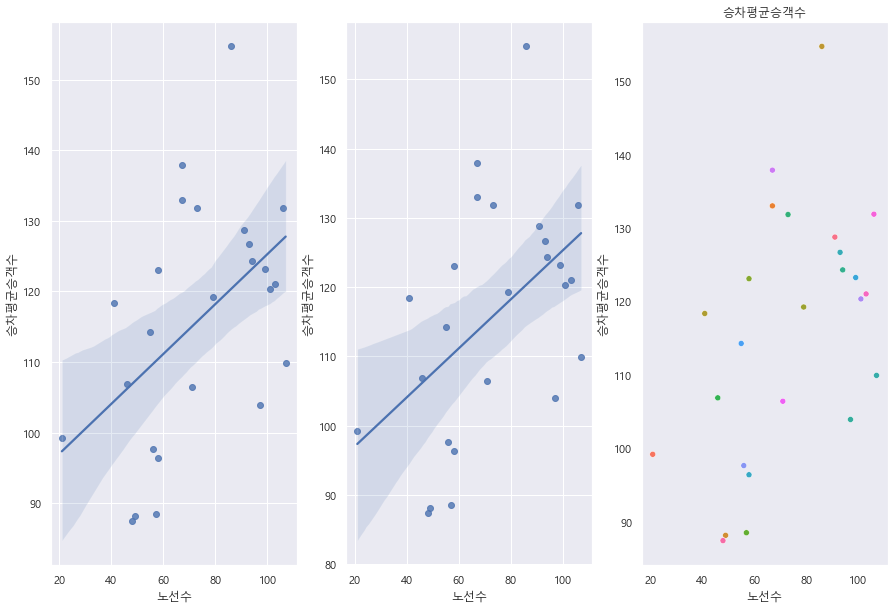

승차평균승객수 : (0.4935407909274122, 0.012170019218131729)


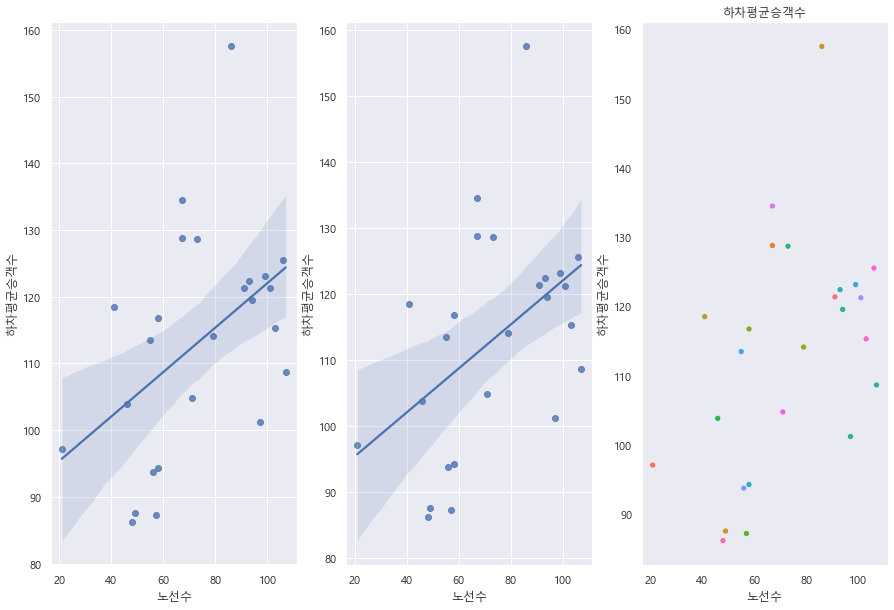

하차평균승객수 : (0.4704401254149345, 0.017632441540646464)


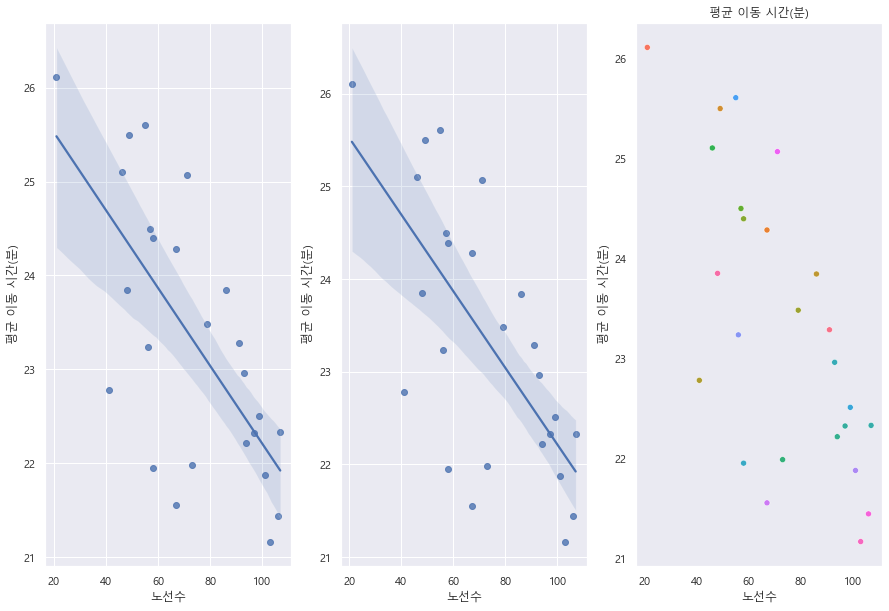

평균 이동 시간(분) : (-0.6874048303585872, 0.00014680687151646357)


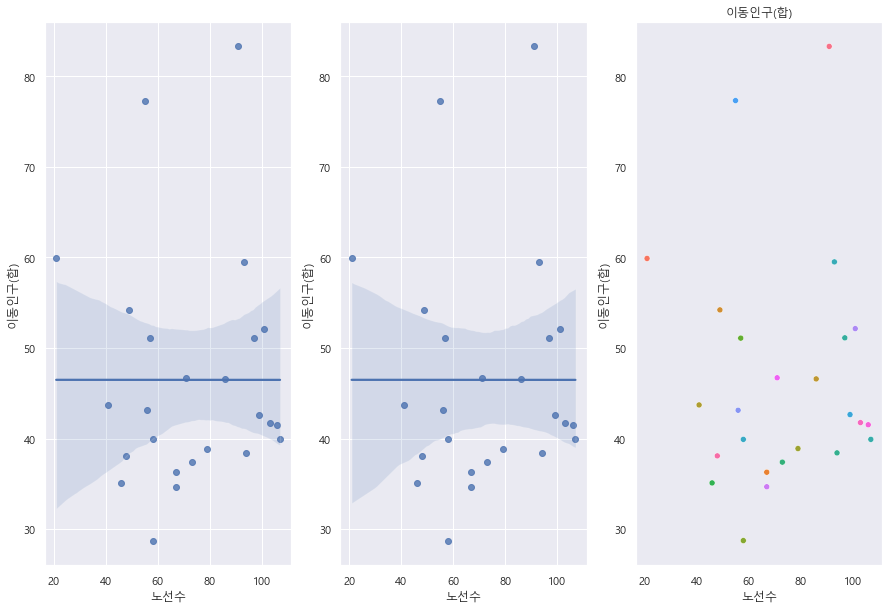

이동인구(합) : (-0.000111318852328849, 0.9995786397407214)


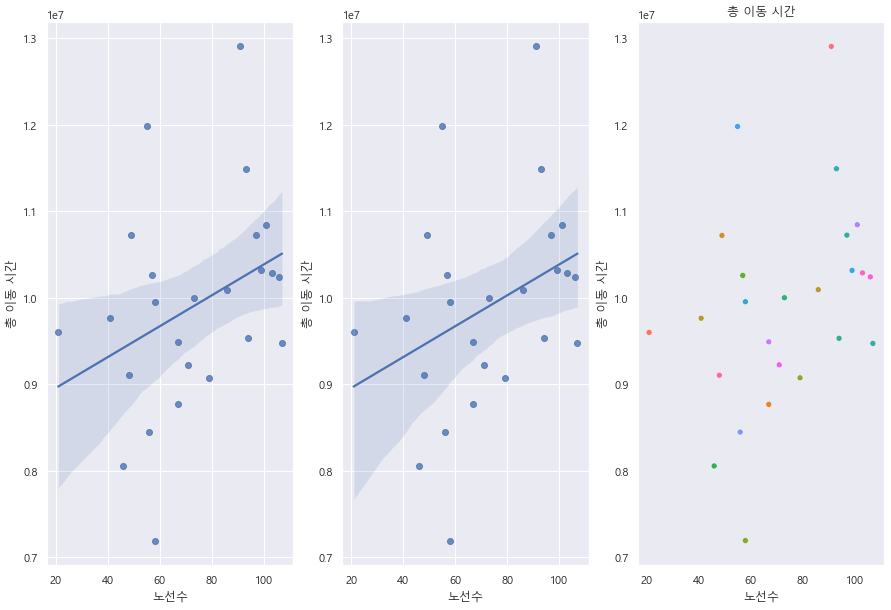

총 이동 시간 : (0.3509799349826018, 0.08538325993557443)


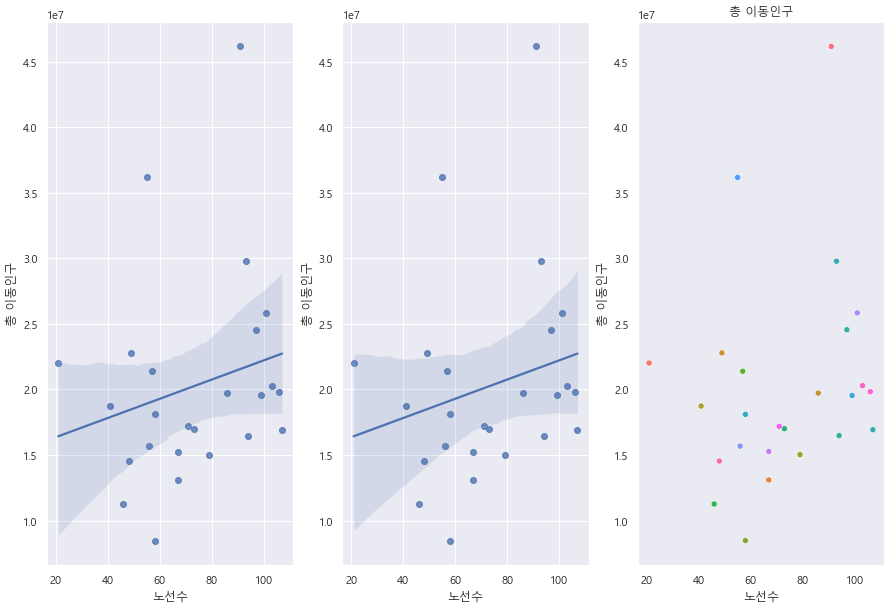

총 이동인구 : (0.22044113587699826, 0.2896579647452525)


In [32]:
# 노선 별 승하차
for i in use:
    plt.figure(figsize=(15,10))
    plt.subplot(1,3,1)
    sns.regplot(data=standard, x='노선수', y=i)
    plt.subplot(1,3,2)
    sns.regplot(data=standard, x='노선수', y=i)
    plt.subplot(1,3,3)
    sns.scatterplot(data=standard, x='노선수', y=i, hue=target, legend=False)
    plt.grid()
    plt.title(i)
    plt.show()
    
    result = spst.pearsonr(standard['노선수'], standard[i])
    print(f'{i} : {result}')

##### 가설 1-2 노선수 별 이용
1. 승/하차총승객수와 관계에서는 상관계수 0.6 이상으 큰 관계가 있어 보임
2. 승/하차평균승객수와 관계에서는 상관계수 0.4 정도의 약간의 관계가 있어 보임
3. 이동인구평균의 관계에서는 상관계수 0.0001로 관계가 없어 보임
4. 총이동인구의 관계에서는 상관계수 0.2 정도의 약간의 관계가 있어 보임

In [37]:
# 자치구별 하나의 정류장/노선 당 이용자
standard['승차승객/정류장수'] = standard['승차총승객수'] / standard['정류장수']
standard['하차승객/정류장수'] = standard['하차총승객수'] / standard['정류장수']
standard['이동인구(합)/정류장수'] = standard['이동인구(합)'] / standard['정류장수']
standard['총 이동인구/정류장수'] = standard['총 이동인구'] / standard['정류장수']

standard['승차승객/노선수'] = standard['승차총승객수'] / standard['노선수']
standard['하차승객/노선수'] = standard['하차총승객수'] / standard['노선수']
standard['총 이동인구/노선수'] = standard['총 이동인구'] / standard['노선수']

standard[['승차승객/정류장수' , '하차승객/정류장수', '이동인구(합)/정류장수', '총 이동인구/정류장수', '승차승객/노선수' , '하차승객/노선수', '총 이동인구/노선수']].describe()

,승차승객/정류장수,하차승객/정류장수,이동인구(합)/정류장수,총 이동인구/정류장수,승차승객/노선수,하차승객/노선수,총 이동인구/노선수
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,2.500000e+01
mean,11922.706529,11633.129072,0.114962,49791.071055,71363.061299,69811.839657,3.143267e+05
std,3377.156483,3232.972114,0.039127,21331.179426,20555.684617,20471.192599,1.964007e+05
min,6453.517241,6314.340230,0.070845,24545.827449,36666.747573,34941.087379,1.460054e+05
25%,9980.371053,9734.551440,0.090966,37118.861601,56830.445545,57259.514851,1.970196e+05
50%,11683.246973,11311.823245,0.099399,42314.718455,71592.357143,68770.946429,2.447850e+05
75%,12972.065015,12712.631579,0.122204,55573.284216,77648.709677,75310.947368,3.202278e+05
max,21217.275281,20218.719101,0.234612,114005.738371,137621.571429,134786.000000,1.048296e+06


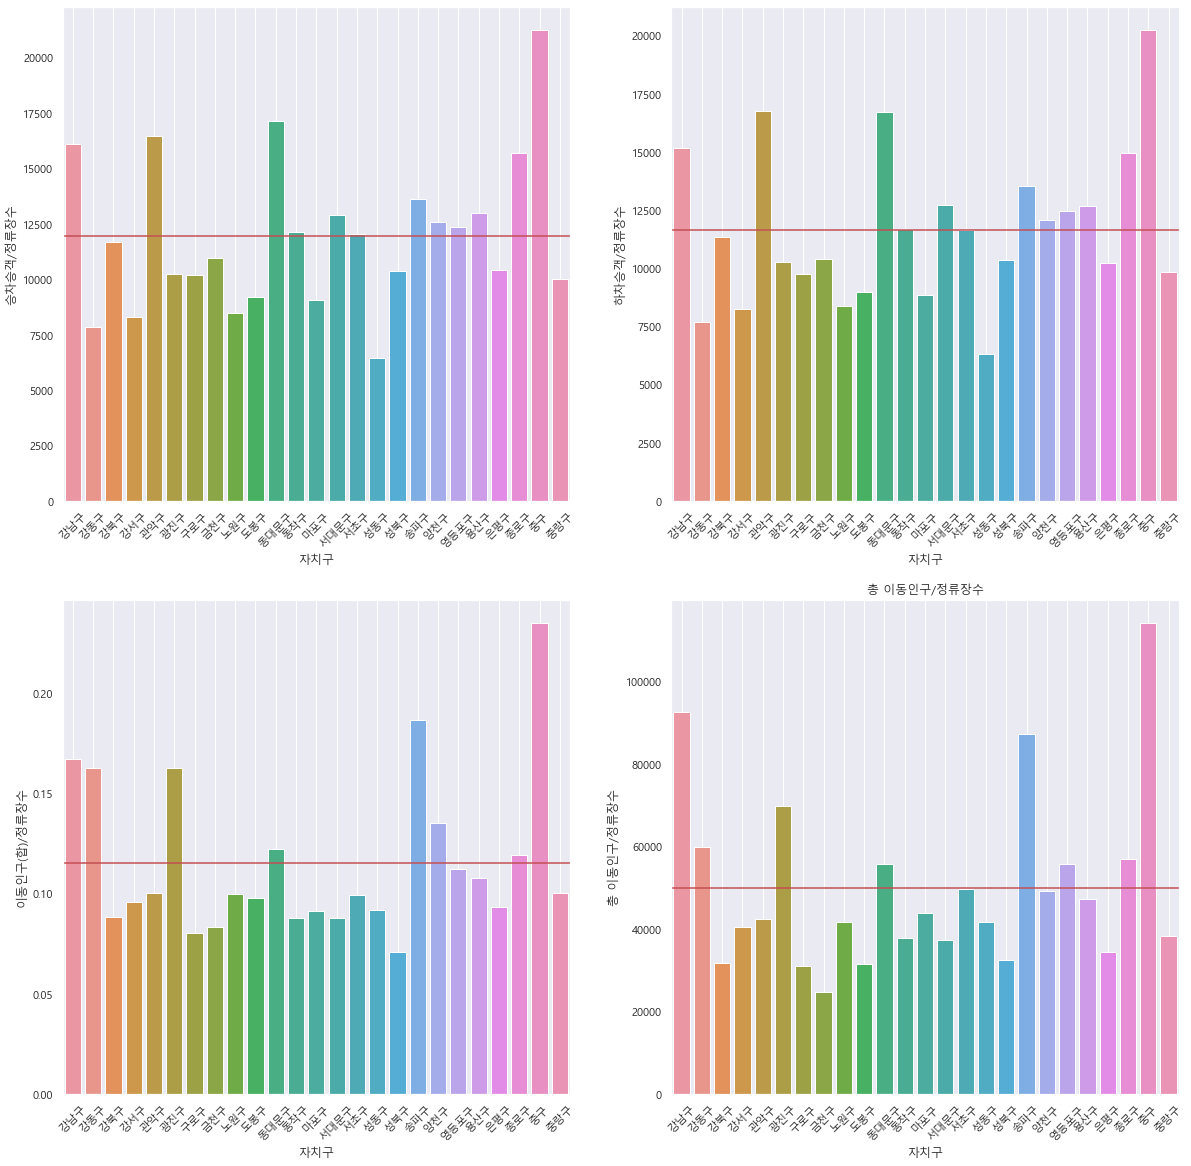

In [39]:
# 자치구별 1 정류장 당 이용자
li = ['승차승객/정류장수' , '하차승객/정류장수', '이동인구(합)/정류장수', '총 이동인구/정류장수']
count = 1
plt.figure(figsize=(20,20))
for i in li:
    plt.subplot(2,2,count)
    sns.barplot(data=standard, x=target, y = i)
    plt.axhline(standard[i].mean(), color='r')
    plt.xticks(rotation=45)
    plt.grid()
    count += 1
plt.title(i)
plt.show()

In [40]:
# ['승차승객/정류장수' , '하차승객/정류장수', '이동인구(합)/정류장수', '총 이동인구/정류장수']
tmp1 = standard.loc[(standard['승차승객/정류장수'] > standard['승차승객/정류장수'].mean())
                        & (standard['하차승객/정류장수'] > standard['하차승객/정류장수'].mean())
                        & (standard['이동인구(합)/정류장수'] > standard['이동인구(합)/정류장수'].mean())
                        & (standard['총 이동인구/정류장수'] > standard['총 이동인구/정류장수'].mean())]
tmp1['자치구']

0      강남구
10    동대문구
17     송파구
22     종로구
23      중구
Name: 자치구, dtype: object

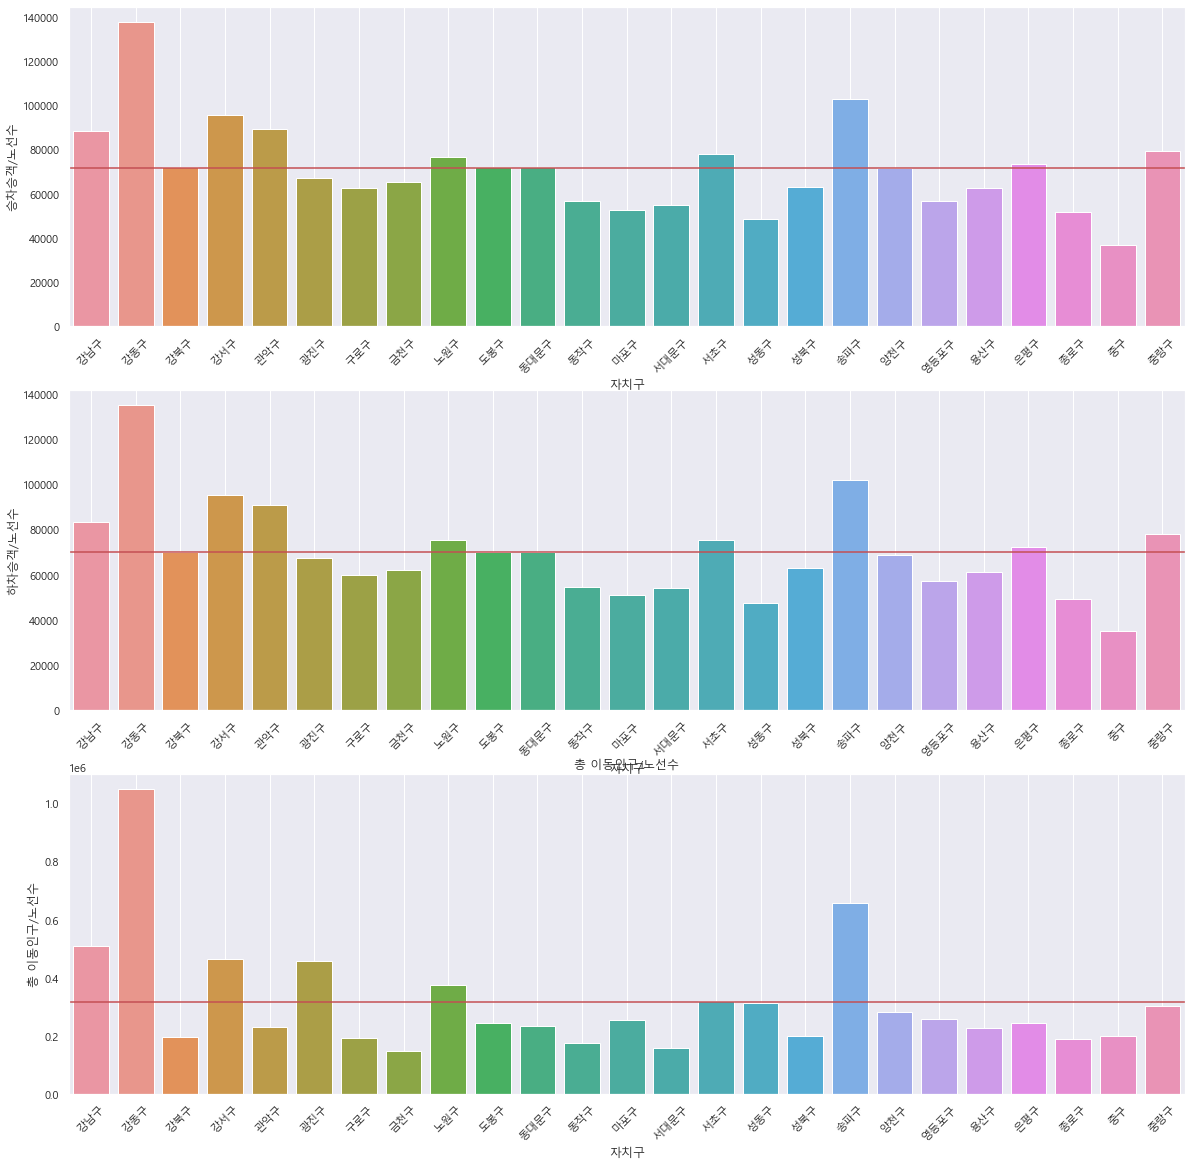

In [49]:
# 자치구별 1 노선 당 이용자
li = ['승차승객/노선수' , '하차승객/노선수', '총 이동인구/노선수']
count = 1
plt.figure(figsize=(20,20))
for i in li:
    plt.subplot(3,1,count)
    sns.barplot(data=standard, x=target, y = i)
    plt.axhline(standard[i].mean(), color='r')
    plt.xticks(rotation=45)
    plt.grid()
    count += 1
plt.title(i)
plt.show()

In [42]:
# ['승차승객/노선수' , '하차승객/노선수', '총 이동인구/노선수']
tmp2 = standard.loc[(standard['승차승객/노선수'] > standard['승차승객/노선수'].mean())
                        & (standard['하차승객/노선수'] > standard['하차승객/노선수'].mean())
                        & (standard['총 이동인구/노선수'] > standard['총 이동인구/노선수'].mean())]
tmp2['자치구']

0     강남구
1     강동구
3     강서구
8     노원구
14    서초구
17    송파구
Name: 자치구, dtype: object

In [46]:
tmp = standard.loc[(standard['승차승객/정류장수'] > standard['승차승객/정류장수'].mean())
                        & (standard['하차승객/정류장수'] > standard['하차승객/정류장수'].mean())
                        & (standard['이동인구(합)/정류장수'] > standard['이동인구(합)/정류장수'].mean())
                        & (standard['총 이동인구/정류장수'] > standard['총 이동인구/정류장수'].mean())
                        & (standard['승차승객/노선수'] > standard['승차승객/노선수'].mean())
                        & (standard['하차승객/노선수'] > standard['하차승객/노선수'].mean())
                        & (standard['총 이동인구/노선수'] > standard['총 이동인구/노선수'].mean())]

standard.loc[standard['자치구'].isin(tmp['자치구'])]

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,승차승객/정류장수,하차승객/정류장수,이동인구(합)/정류장수,총 이동인구/정류장수,승차승객/노선수,하차승객/노선수,총 이동인구/노선수
0,강남구,499,91,8030483,7569213,128.767927,121.371512,23.284573,83.309306,12904380,46170267.4,16093.152305,15168.763527,0.166953,92525.585972,88247.065934,83178.164835,507365.575824
17,송파구,415,55,5641742,5603488,114.270072,113.495260,25.605607,77.326264,11978610,36174154.0,13594.559036,13502.380723,0.186328,87166.636145,102577.127273,101881.600000,657711.890909


### 가설 1 : 정류장과 노선 수 대비 이용자
<p>강남구/송파구</p>
<p>정류장과 노선의 수 대비 승/하차객과 이동인구의 상관관계에서 중간 이상의 지표를 가지고</p>
<p>지역구 별 하나의 정류장/노선 당 이용자가 높은 지역을 구함</p>

In [50]:
use = ['승차총승객수','하차총승객수','승차평균승객수','하차평균승객수', '이동인구(합)', '총 이동인구']

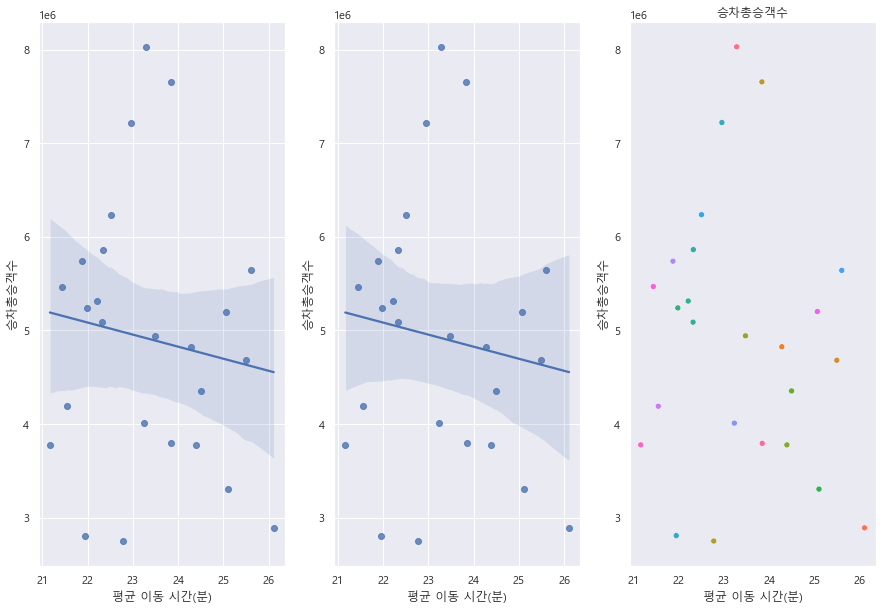

승차총승객수 : (-0.13003622625415018, 0.5355647655353494)


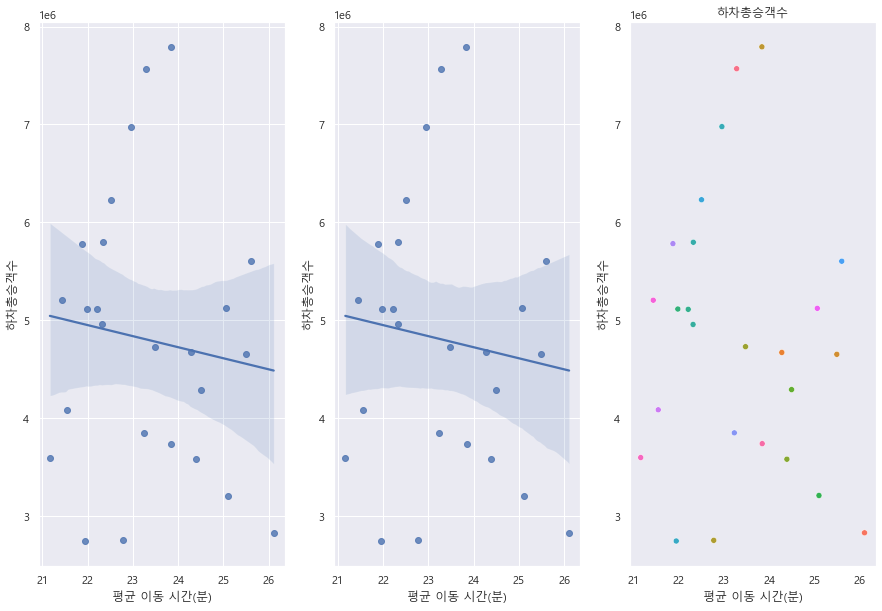

하차총승객수 : (-0.11561132590784617, 0.5821045664261221)


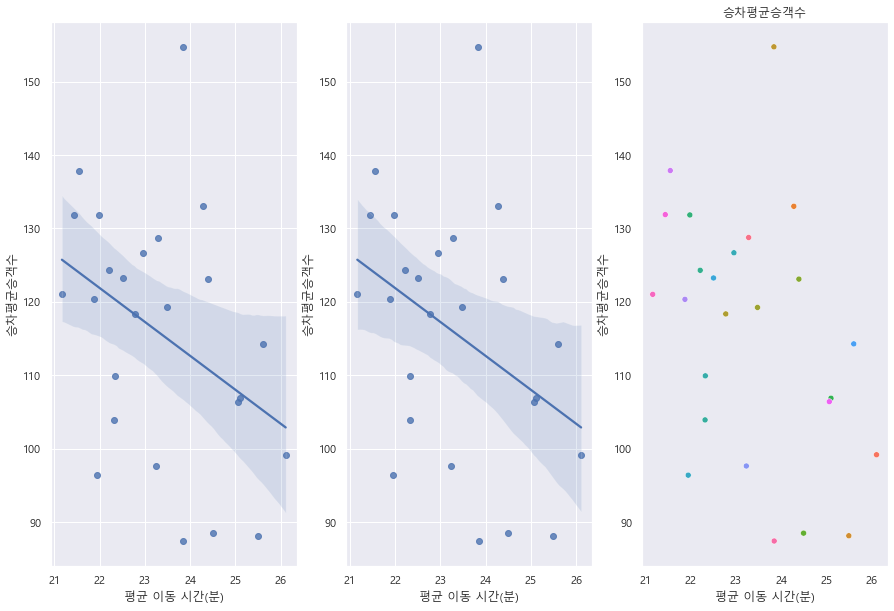

승차평균승객수 : (-0.38819691316854543, 0.05516320629651265)


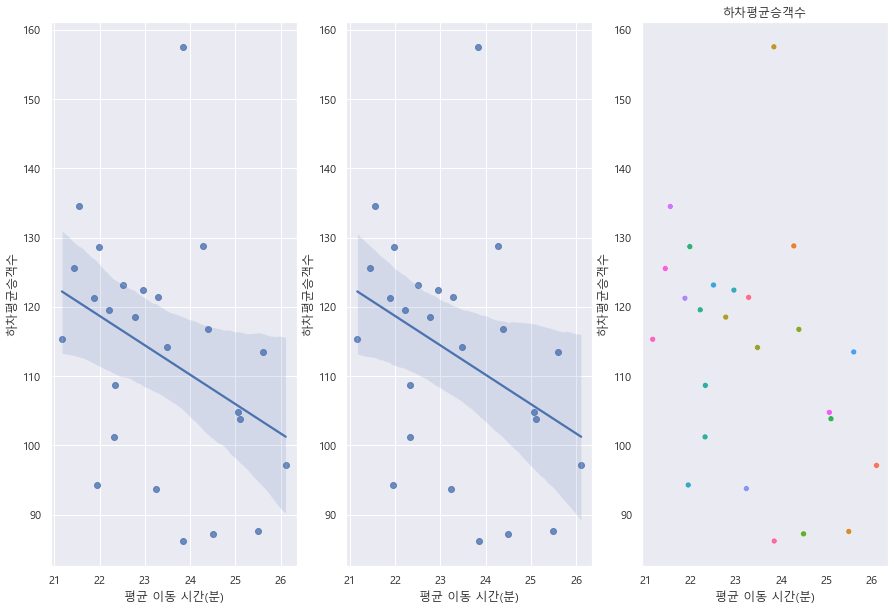

하차평균승객수 : (-0.36049460362359953, 0.07668259838726062)


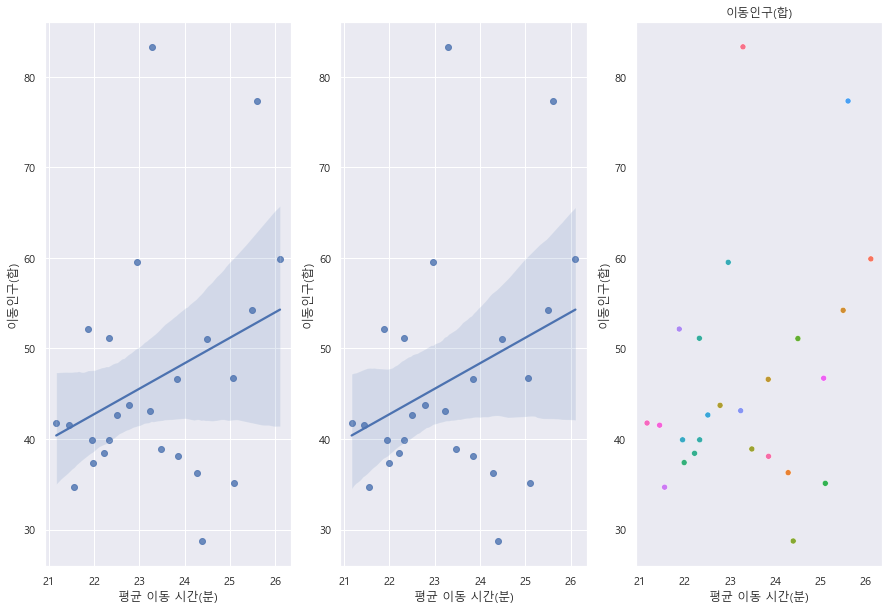

이동인구(합) : (0.31544000540549627, 0.12454494936488411)


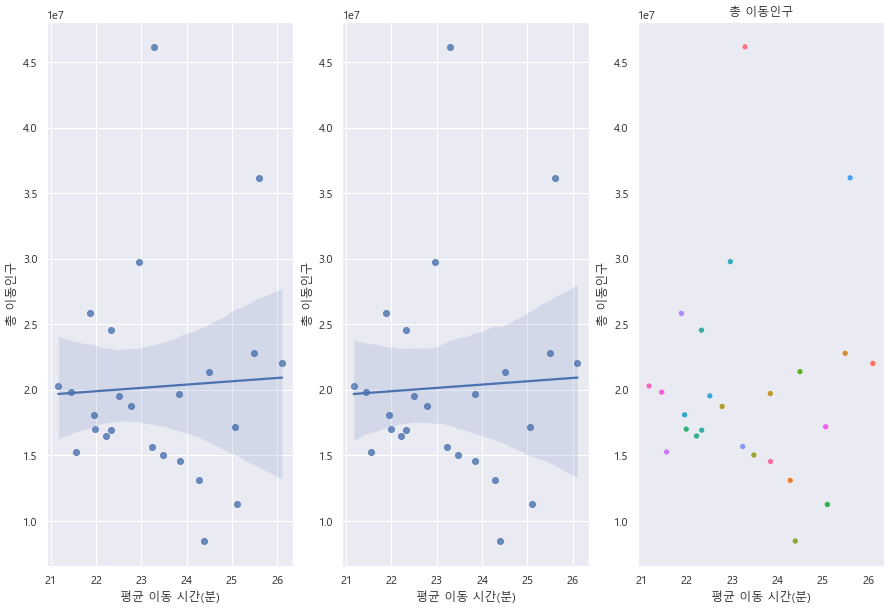

총 이동인구 : (0.045696595345735225, 0.8282874998031786)


In [51]:
# 평균 이동 시간(분) 별 승하차
for i in use:
    plt.figure(figsize=(15,10))
    plt.subplot(1,3,1)
    sns.regplot(data=standard, x='평균 이동 시간(분)', y=i)
    plt.subplot(1,3,2)
    sns.regplot(data=standard, x='평균 이동 시간(분)', y=i)
    plt.subplot(1,3,3)
    sns.scatterplot(data=standard, x='평균 이동 시간(분)', y=i, hue=target, legend=False)
    plt.grid()
    plt.title(i)
    plt.show()

    result = spst.pearsonr(standard['평균 이동 시간(분)'], standard[i])
    print(f'{i} : {result}')

##### 가설2-1 평균 이동 시간(분) 별 이용자수
1. 승/하차총승객수와 관계에서는 상관계수 0.1 로 관계가 거의 없어 보임임
2. 승/하차평균승객수와 관계에서는 상관계수 0.3 정도의 약간의 관계가 있어 보임
3. 이동인구평균의 관계에서는 상관계수 0.3 정도의 약간의 관계가 있어 보임
4. 총이동인구의 관계에서는 상관계수 0.04로 관계가 없어 보임

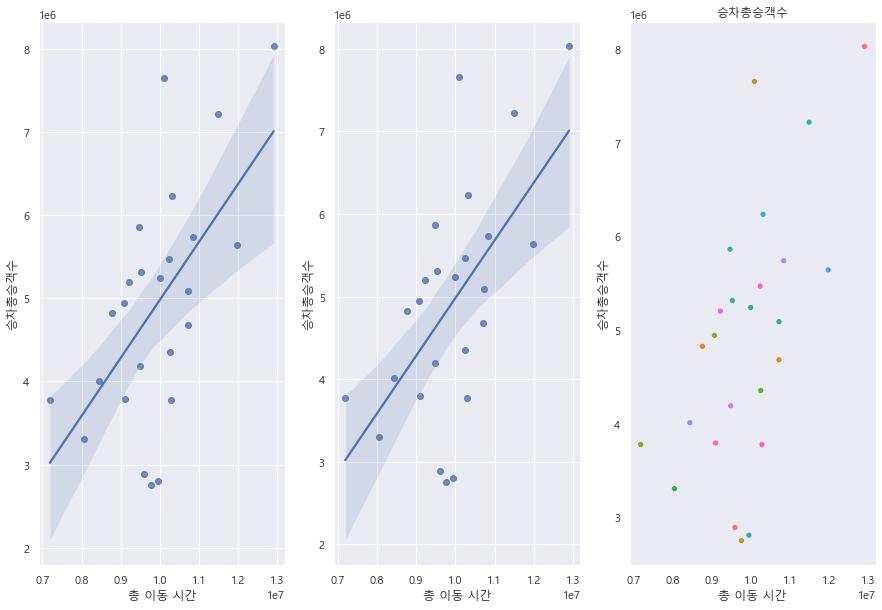

승차총승객수 : (0.5955333451957727, 0.001684620372494398)


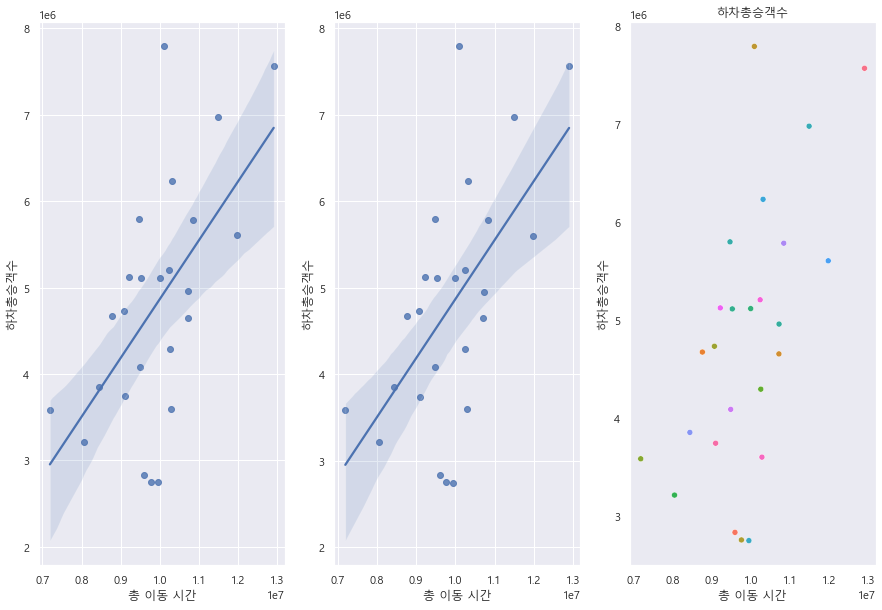

하차총승객수 : (0.5901657349468873, 0.0019000395965845936)


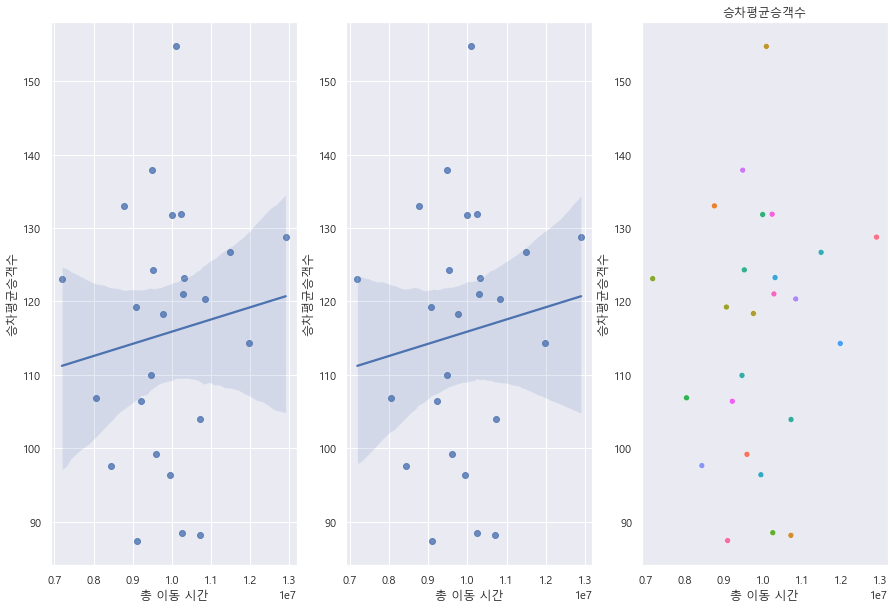

승차평균승객수 : (0.11783974420329976, 0.5748012106288645)


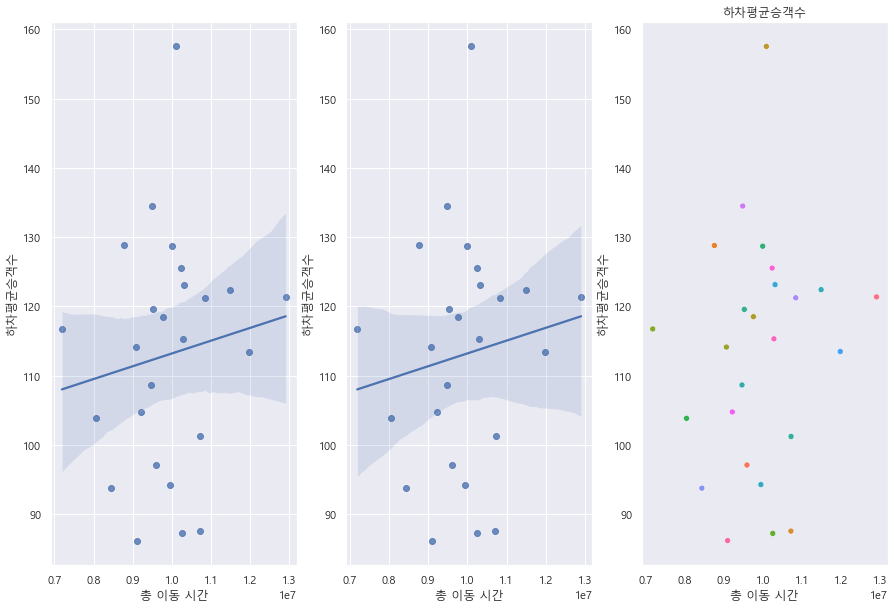

하차평균승객수 : (0.13269097182267528, 0.5271947100597492)


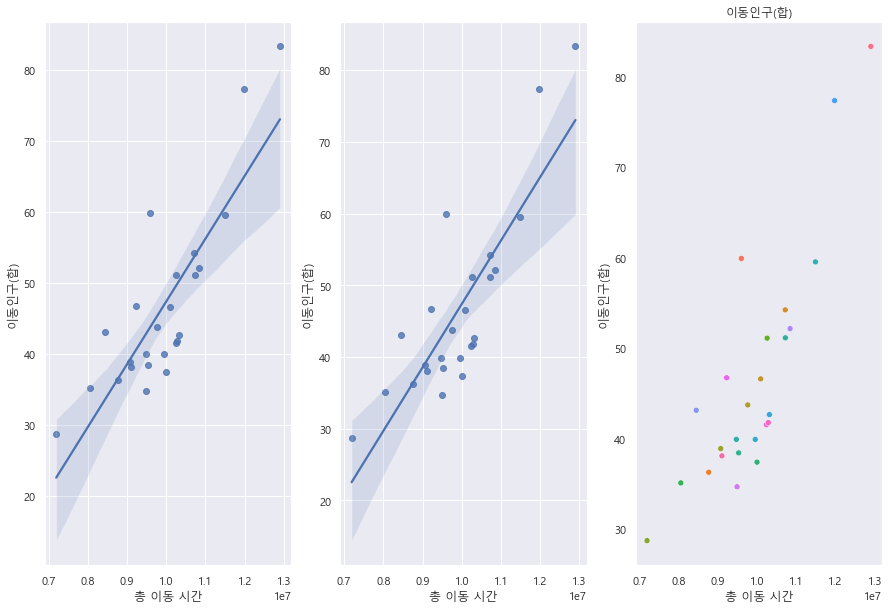

이동인구(합) : (0.8380909585582496, 1.7092649680260089e-07)


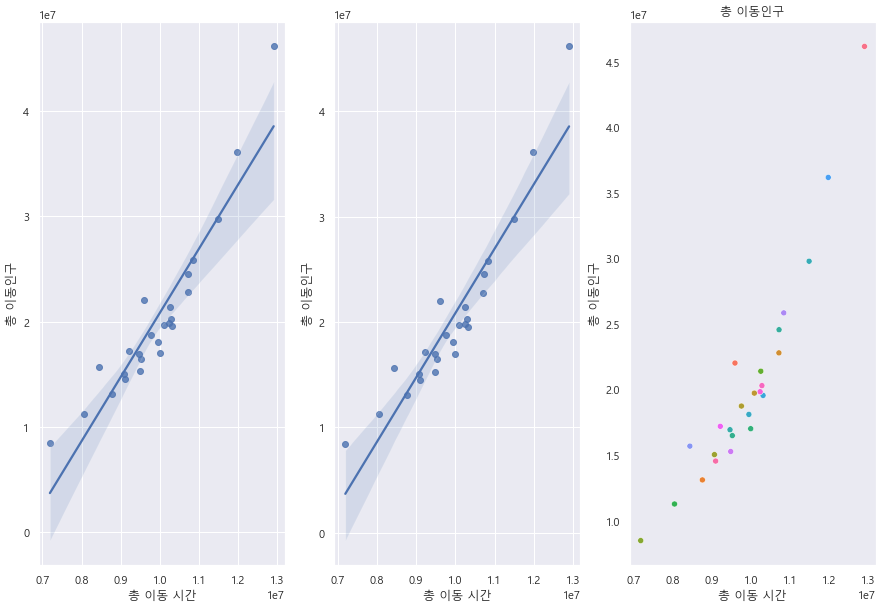

총 이동인구 : (0.934049797227354, 9.095861793625874e-12)


In [52]:
# 총 이동 시간 별 승하차
for i in use:
    plt.figure(figsize=(15,10))
    plt.subplot(1,3,1)
    sns.regplot(data=standard, x='총 이동 시간', y=i)
    plt.subplot(1,3,2)
    sns.regplot(data=standard, x='총 이동 시간', y=i)
    plt.subplot(1,3,3)
    sns.scatterplot(data=standard, x='총 이동 시간', y=i, hue=target, legend=False)
    plt.grid()
    plt.title(i)
    plt.show()

    result = spst.pearsonr(standard['총 이동 시간'], standard[i])
    print(f'{i} : {result}')

##### 가설2-2 총 이동 시간 별 이용자수
1. 승/하차총승객수와 관계에서는 상관계수 0.5 이상의 큰 관계가 있어 보임
2. 승/하차평균승객수와 관계에서는 상관계수 0.11로 관계가 거의 없어 보임
3. 이동인구 평균과 총합의 관계에서 상관계사 0.8, 0.9 이상의 큰 관계가 있어 보임

In [91]:
# 자치구별 이동 시간(분당) 이용자수
standard['승차평균승객수/평균 이동 시간(분)'] = standard['승차평균승객수'] / standard['평균 이동 시간(분)']
standard['하차평균승객수/평균 이동 시간(분)'] = standard['하차평균승객수'] / standard['평균 이동 시간(분)']
standard['이동인구(합)/평균 이동 시간(분)'] = standard['이동인구(합)'] / standard['평균 이동 시간(분)']

standard['승차승객/총 이동 시간'] = standard['승차총승객수'] / standard['총 이동 시간']
standard['하차승객/총 이동 시간'] = standard['하차총승객수'] / standard['총 이동 시간']
standard['이동인구(합)/총 이동 시간'] = standard['이동인구(합)'] / standard['총 이동 시간']
standard['총 이동인구/총 이동 시간'] = standard['총 이동인구'] / standard['총 이동 시간']

standard[['승차평균승객수/평균 이동 시간(분)' , '하차평균승객수/평균 이동 시간(분)', '이동인구(합)/평균 이동 시간(분)'
        , '승차승객/총 이동 시간', '하차승객/총 이동 시간' , '이동인구(합)/총 이동 시간', '총 이동인구/총 이동 시간']].describe()

,승차평균승객수/평균 이동 시간(분),하차평균승객수/평균 이동 시간(분),이동인구(합)/평균 이동 시간(분),승차승객/총 이동 시간,하차승객/총 이동 시간,이동인구(합)/총 이동 시간,총 이동인구/총 이동 시간
count,25.000000,25.000000,25.000000,25.000000,25.000000,2.500000e+01,25.000000
mean,4.993413,4.876464,1.989346,0.493808,0.482498,4.643155e-06,1.989346
std,0.883769,0.863221,0.510339,0.115536,0.114877,7.891247e-07,0.510339
min,3.456074,3.435213,1.177749,0.281655,0.275993,3.654693e-06,1.177749
25%,4.256856,4.179981,1.700838,0.424455,0.418550,4.060204e-06,1.700838
50%,5.078090,4.866795,1.894758,0.524148,0.498165,4.358497e-06,1.894758
75%,5.530182,5.448504,2.126082,0.557696,0.536498,5.057356e-06,2.126082
max,6.490673,6.606532,3.577876,0.758623,0.772165,6.455894e-06,3.577876


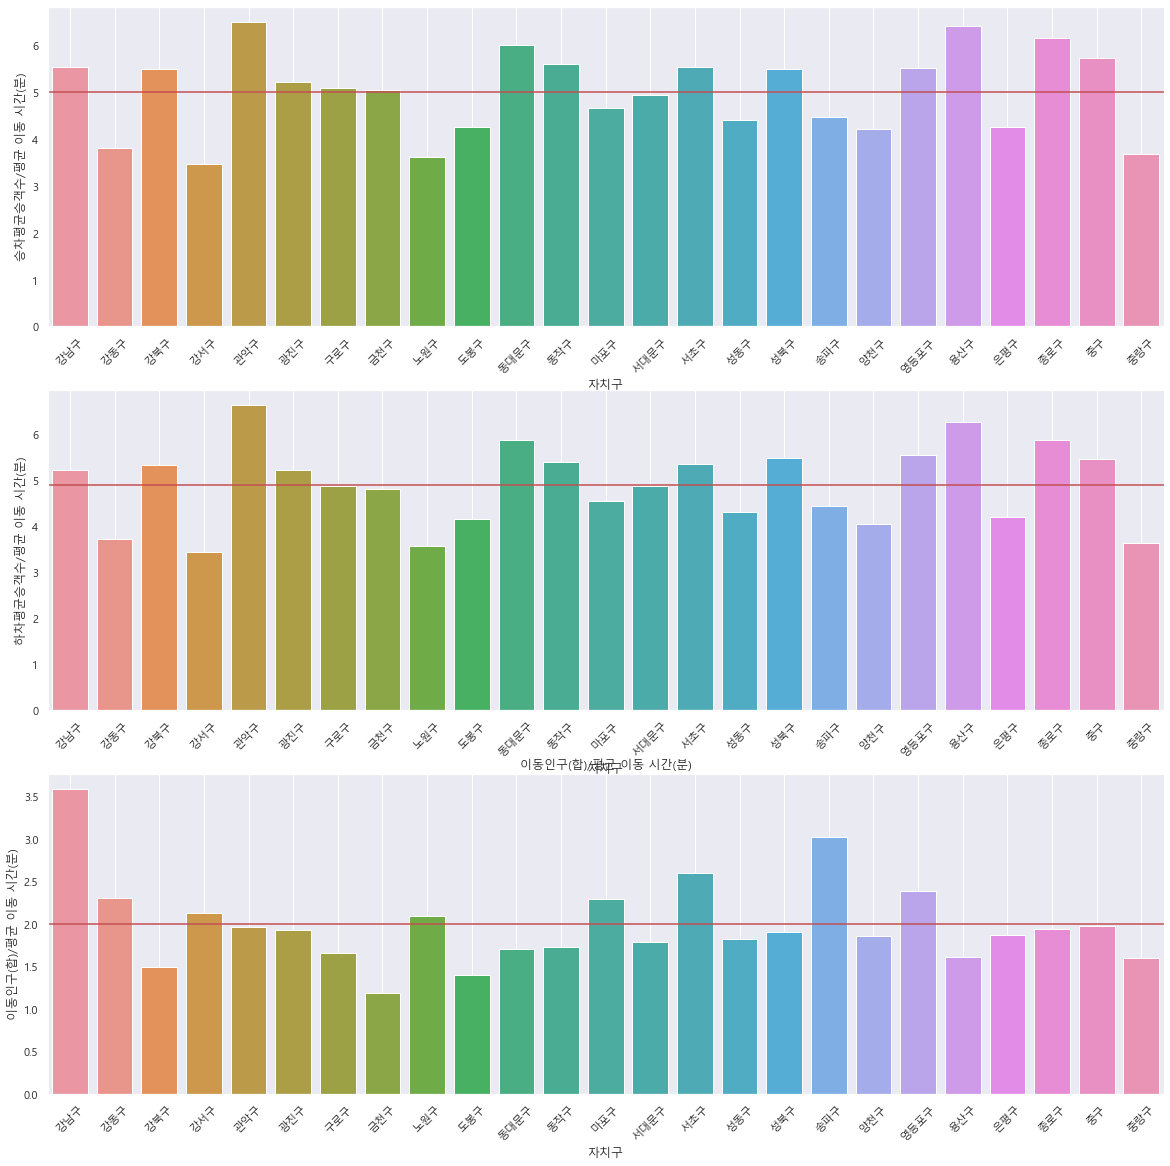

In [92]:
# 자치구별 평균 이동 시간 분당 이용자
li = ['승차평균승객수/평균 이동 시간(분)' , '하차평균승객수/평균 이동 시간(분)', '이동인구(합)/평균 이동 시간(분)']
count = 1
plt.figure(figsize=(20,20))
for i in li:
    plt.subplot(3,1,count)
    sns.barplot(data=standard, x=target, y = i)
    plt.axhline(standard[i].mean(), color='r')
    plt.xticks(rotation=45)
    plt.grid()
    count += 1
plt.title(i)
plt.show()

In [93]:
# ['승차평균승객수/평균 이동 시간(분)' , '하차평균승객수/평균 이동 시간(분)', '이동인구(합)/평균 이동 시간(분)']
tmp3 = standard.loc[(standard['승차평균승객수/평균 이동 시간(분)'] > standard['승차평균승객수/평균 이동 시간(분)'].mean())
                        & (standard['하차평균승객수/평균 이동 시간(분)'] > standard['하차평균승객수/평균 이동 시간(분)'].mean())
                        & (standard['이동인구(합)/평균 이동 시간(분)'] > standard['이동인구(합)/평균 이동 시간(분)'].mean())
                    ]
tmp3['자치구']

0      강남구
14     서초구
19    영등포구
Name: 자치구, dtype: object

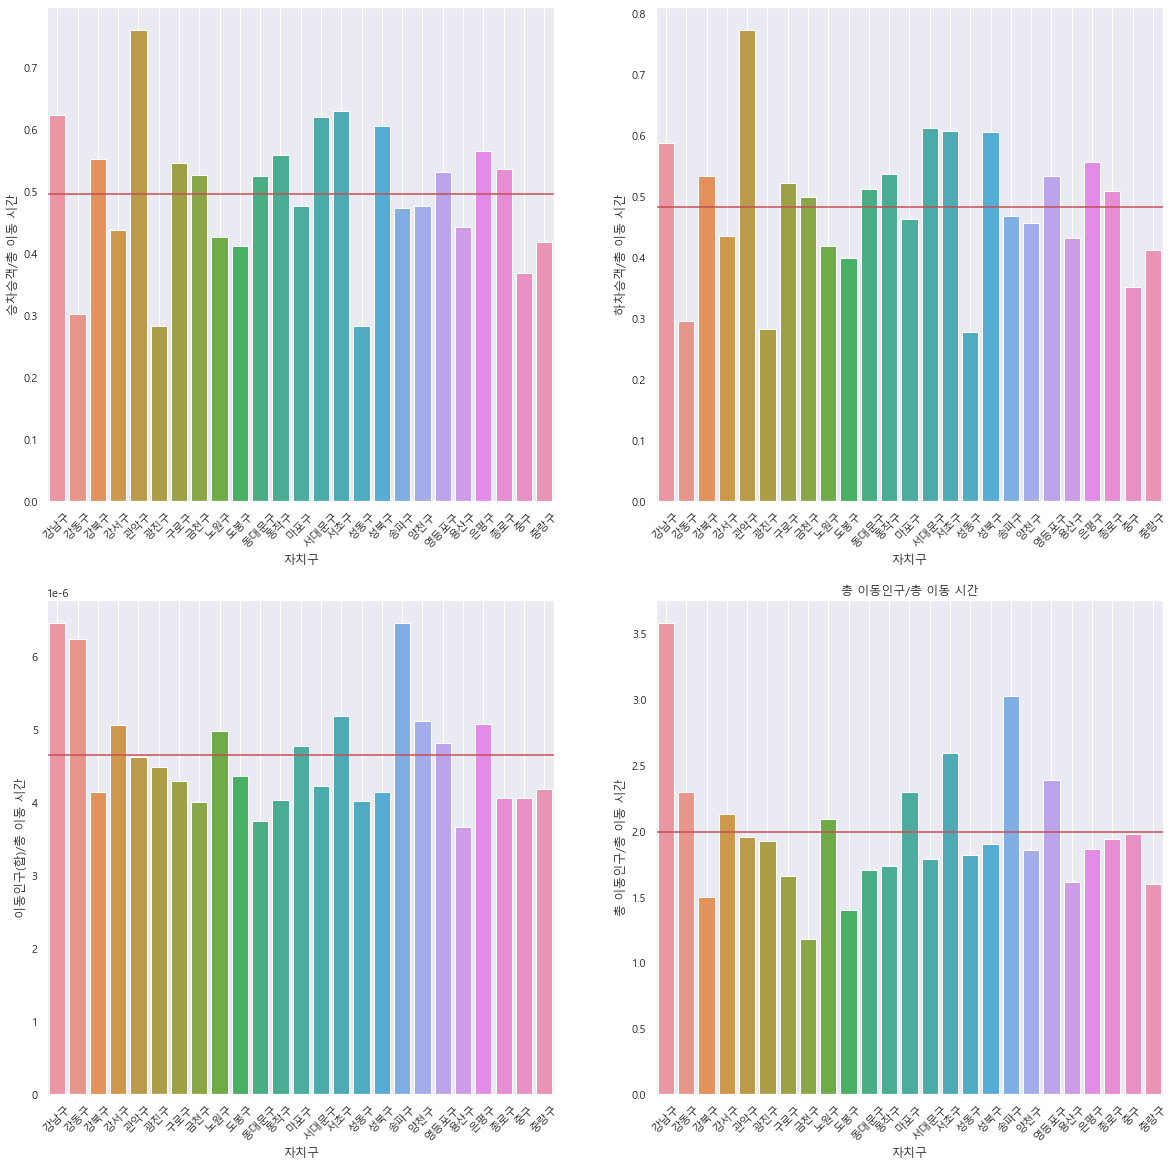

In [95]:
# 자치구별 총 이동 시간 분당 이용자
li = ['승차승객/총 이동 시간', '하차승객/총 이동 시간' , '이동인구(합)/총 이동 시간', '총 이동인구/총 이동 시간']
count = 1
plt.figure(figsize=(20,20))
for i in li:
    plt.subplot(2,2,count)
    sns.barplot(data=standard, x=target, y = i)
    plt.axhline(standard[i].mean(), color='r')
    plt.xticks(rotation=45)
    plt.grid()
    count += 1
plt.title(i)
plt.show()

In [98]:
# ['승차승객/총 이동 시간', '하차승객/총 이동 시간' , '이동인구(합)/총 이동 시간', '총 이동인구/총 이동 시간']
tmp4 = standard.loc[(standard['승차승객/총 이동 시간'] > standard['승차승객/총 이동 시간'].mean())
                        & (standard['하차승객/총 이동 시간'] > standard['하차승객/총 이동 시간'].mean())
                        & (standard['이동인구(합)/총 이동 시간'] > standard['이동인구(합)/총 이동 시간'].mean())
                        & (standard['총 이동인구/총 이동 시간'] > standard['총 이동인구/총 이동 시간'].mean())
                    ]
tmp4['자치구']

0      강남구
14     서초구
19    영등포구
Name: 자치구, dtype: object

In [99]:
# ['승차승객/총 이동 시간', '하차승객/총 이동 시간' , '이동인구(합)/총 이동 시간', '총 이동인구/총 이동 시간']
tmp4 = standard.loc[(standard['승차평균승객수/평균 이동 시간(분)'] > standard['승차평균승객수/평균 이동 시간(분)'].mean())
                        & (standard['하차평균승객수/평균 이동 시간(분)'] > standard['하차평균승객수/평균 이동 시간(분)'].mean())
                        & (standard['이동인구(합)/평균 이동 시간(분)'] > standard['이동인구(합)/평균 이동 시간(분)'].mean())
                        & (standard['승차승객/총 이동 시간'] > standard['승차승객/총 이동 시간'].mean())
                        & (standard['하차승객/총 이동 시간'] > standard['하차승객/총 이동 시간'].mean())
                        & (standard['이동인구(합)/총 이동 시간'] > standard['이동인구(합)/총 이동 시간'].mean())
                        & (standard['총 이동인구/총 이동 시간'] > standard['총 이동인구/총 이동 시간'].mean())
                    ]
tmp4['자치구']

0      강남구
14     서초구
19    영등포구
Name: 자치구, dtype: object

### 가설 2 : 이동시간 대비 이용자
<p>강남구/서초구/영등포구</p>
<p>평균 이동시간과 총 이동시간 대비 승/하차객과 이동인구의 상관관계에서 중간 이상의 지표를 가지고</p>
<p>지역구별 분 당 이용자가 높은 지역을 구함</p>

In [100]:
o_move_m.sort_values(by='빈도', ascending=False)

,출발,도착,총 이동인구,총 이동 시간,이동인구(합),평균 이동 시간(분),빈도,총이동인구/빈도,총이동시간/빈도
26,강동구,강동구,15002675.88,669180,319.178706,14.236661,47004,319.178706,14.236661
0,강남구,강남구,24645635.26,603670,525.728690,12.877194,46879,525.728690,12.877194
442,송파구,송파구,23308262.68,638050,498.946006,13.658354,46715,498.946006,13.658354
78,강서구,강서구,14318815.49,641980,308.888073,13.848908,46356,308.888073,13.848908
364,서초구,서초구,14431981.86,606490,313.731916,13.184279,46001,313.731916,13.184279
...,...,...,...,...,...,...,...,...,...
459,양천구,도봉구,17740.78,123960,5.335573,37.281203,3325,5.335573,37.281203
243,도봉구,양천구,17229.90,119720,5.280386,36.690162,3263,5.280386,36.690162
57,강북구,금천구,23665.37,122200,7.281652,37.600000,3250,7.281652,37.600000
184,금천구,도봉구,17780.73,122270,5.872104,40.379789,3028,5.872104,40.379789


In [56]:
# 지역구 간의 이동 빈도 대비 이동인구/시간
o_move_m['총이동인구/빈도'] = o_move_m['총 이동인구'] / o_move_m['빈도']
o_move_m['총이동시간/빈도'] = o_move_m['총 이동 시간'] / o_move_m['빈도']

In [73]:
o_move_m.sort_values(by=['총이동인구/빈도', '총이동시간/빈도'], ascending=False).head(30)

,출발,도착,총 이동인구,총 이동 시간,이동인구(합),평균 이동 시간(분),빈도,총이동인구/빈도,총이동시간/빈도
0,강남구,강남구,24645635.26,603670,525.728690,12.877194,46879,525.728690,12.877194
442,송파구,송파구,23308262.68,638050,498.946006,13.658354,46715,498.946006,13.658354
26,강동구,강동구,15002675.88,669180,319.178706,14.236661,47004,319.178706,14.236661
364,서초구,서초구,14431981.86,606490,313.731916,13.184279,46001,313.731916,13.184279
78,강서구,강서구,14318815.49,641980,308.888073,13.848908,46356,308.888073,13.848908
208,노원구,노원구,13014050.96,619070,287.298577,13.666608,45298,287.298577,13.666608
312,마포구,마포구,12558137.53,570280,283.013038,12.851960,44373,283.013038,12.851960
494,영등포구,영등포구,12677621.58,578880,278.604553,12.721519,45504,278.604553,12.721519
546,은평구,은평구,10823371.20,630630,239.869048,13.976109,45122,239.869048,13.976109
104,관악구,관악구,10468061.42,598090,236.534287,13.514326,44256,236.534287,13.514326


In [75]:
tmp = o_move_m.loc[o_move_m['출발'] != o_move_m['도착']]
tmp.sort_values(by=['총이동인구/빈도', '총이동시간/빈도'], ascending=False).head(20)

,출발,도착,총 이동인구,총 이동 시간,이동인구(합),평균 이동 시간(분),빈도,총이동인구/빈도,총이동시간/빈도
350,서초구,강남구,4802309.66,594630,124.473437,15.412509,38581,124.473437,15.412509
14,강남구,서초구,4814578.33,608310,124.404494,15.718198,38701,124.404494,15.718198
425,송파구,강남구,3314641.58,654700,93.673635,18.502190,35385,93.673635,18.502190
17,강남구,송파구,3326366.66,676720,93.269590,18.974877,35664,93.269590,18.974877
42,강동구,송파구,2640613.78,658870,73.830280,18.421685,35766,73.830280,18.421685
426,송파구,강동구,2647876.11,679810,73.625740,18.902514,35964,73.625740,18.902514
337,서대문구,마포구,2374696.77,557610,67.751691,15.908987,35050,67.751691,15.908987
313,마포구,서대문구,2392763.39,560880,67.339189,15.784763,35533,67.339189,15.784763
93,강서구,양천구,2472391.56,611900,64.445615,15.949849,38364,64.445615,15.949849
453,양천구,강서구,2480691.41,619350,64.077373,15.998089,38714,64.077373,15.998089


In [90]:
tmp = pd.crosstab(o_move['출발'], o_move['도착'], normalize='all')
tmp

도착,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
출발,,,,,,,,,,,,,,,,,,,,,
강남구,0.004399,0.002330,0.001460,0.001791,0.002346,0.002561,0.001653,0.001326,0.001808,0.001289,...,0.002693,0.001915,0.003347,0.001469,0.002049,0.002309,0.001549,0.001975,0.002201,0.001860
강동구,0.002251,0.004411,0.000736,0.000925,0.000925,0.002297,0.000677,0.000457,0.001227,0.000720,...,0.001574,0.001063,0.003356,0.000599,0.001065,0.001013,0.000660,0.001179,0.001281,0.001520
강북구,0.001333,0.000726,0.004044,0.000666,0.000595,0.000998,0.000486,0.000305,0.002408,0.003134,...,0.001204,0.003158,0.001037,0.000397,0.000821,0.000954,0.000811,0.001695,0.001539,0.001265
강서구,0.001652,0.000877,0.000646,0.004350,0.001492,0.000911,0.001917,0.001203,0.000792,0.000523,...,0.001034,0.000961,0.001286,0.003600,0.002448,0.001340,0.001487,0.001315,0.001324,0.000672
관악구,0.002241,0.000921,0.000610,0.001551,0.004153,0.001068,0.002342,0.002878,0.000749,0.000456,...,0.001054,0.000889,0.001599,0.001416,0.002354,0.001456,0.000926,0.001203,0.001301,0.000665
광진구,0.002521,0.002340,0.001026,0.000962,0.001084,0.004146,0.000782,0.000539,0.001686,0.000970,...,0.003030,0.001398,0.002810,0.000703,0.001165,0.001248,0.000790,0.001414,0.001641,0.002437
구로구,0.001559,0.000691,0.000512,0.001944,0.002365,0.000804,0.004146,0.002516,0.000682,0.000450,...,0.000833,0.000765,0.001104,0.002739,0.003081,0.001187,0.000945,0.001121,0.001152,0.000563
금천구,0.001263,0.000480,0.000353,0.001263,0.002870,0.000566,0.002499,0.003999,0.000439,0.000284,...,0.000597,0.000525,0.000856,0.001201,0.001990,0.000859,0.000629,0.000775,0.000812,0.000413
노원구,0.001689,0.001231,0.002409,0.000854,0.000710,0.001629,0.000655,0.000390,0.004251,0.003156,...,0.001455,0.002778,0.001441,0.000542,0.000986,0.001071,0.000832,0.001553,0.001492,0.002929


### 가설 3 : 지역간의 이동빈도
<p>강남구/송파구/서초구</p>
<p>같은 지역구 내에서의 이동인구와 이동시간 대비 빈도 비교 ( 상위 5 지역 : 강남구 / 송파구 / 강동구 / 서초구 / 강서구)</p>
<p>다른 지역구 간의 이동인구와 이동시간 대비 빈도 비교  ( 상위 3 지역 : 서초->강남 / 강남->서초 / 송파->강남)</p>
